In [6]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression
# Scipy for statistics
import scipy


# Data Preprocessing for Classification Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   int64  
 10  SOURCE        4412 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 379.3 KB


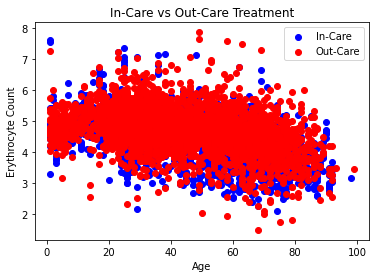

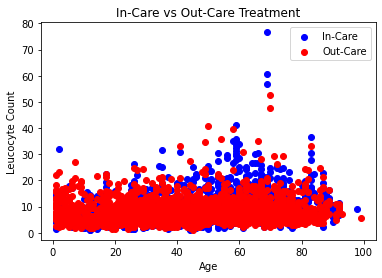

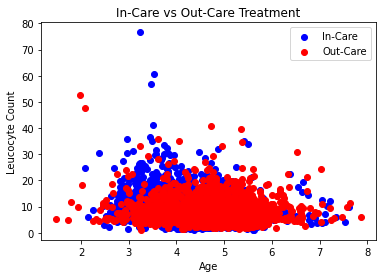

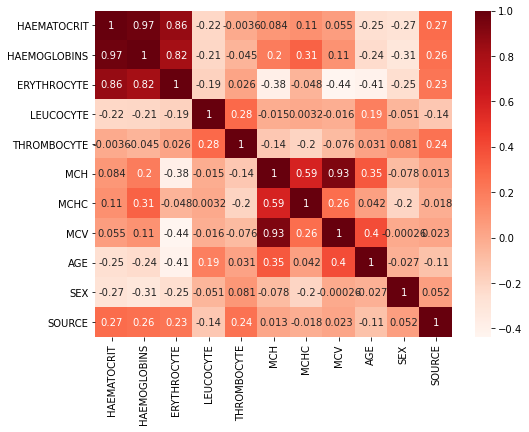

HAEMATOCRIT     0.271190
HAEMOGLOBINS    0.255793
ERYTHROCYTE     0.232001
LEUCOCYTE       0.137359
THROMBOCYTE     0.243202
MCH             0.013308
MCHC            0.017711
MCV             0.022524
AGE             0.109533
SEX             0.051795
Name: SOURCE, dtype: float64
We see that the Haematocrit is the most correlated variable with respect to determining in-care vs out-care treatment.


In [11]:
df2 = pd.read_csv('patient_treatment_CLASSIFICATION.csv')
df2.SEX = df2.SEX.replace('M', 0)
df2.SEX = df2.SEX.replace('F', 1)
df2.SOURCE = df2.SOURCE.replace('out', 1)
df2.SOURCE = df2.SOURCE.replace('in', 0)
M = df2[df2.SOURCE == 0]
B = df2[df2.SOURCE == 1]
df2.head()
df2.info()
df2.head()
#Plotting to visualize classification data and make predictions
plt.title("In-Care vs Out-Care Treatment")
plt.ylabel("Erythrocyte Count")
plt.xlabel("Age")
plt.scatter(M.AGE, M.ERYTHROCYTE, color = "b", label = "In-Care")
plt.scatter(B.AGE, B.ERYTHROCYTE, color = "r", label = "Out-Care")
plt.legend()
plt.show()
plt.title("In-Care vs Out-Care Treatment")
plt.ylabel("Leucocyte Count")
plt.xlabel("Age")
plt.scatter(M.AGE, M.LEUCOCYTE, color = "b", label = "In-Care")
plt.scatter(B.AGE, B.LEUCOCYTE, color = "r", label = "Out-Care")
plt.legend()
plt.show()
plt.title("In-Care vs Out-Care Treatment")
plt.ylabel("Leucocyte Count")
plt.xlabel("Age")
plt.scatter(M.ERYTHROCYTE, M.LEUCOCYTE, color = "b", label = "In-Care")
plt.scatter(B.ERYTHROCYTE, B.LEUCOCYTE, color = "r", label = "Out-Care")
plt.legend()
plt.show()
#Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["SOURCE"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target<1]
print(relevant_features)
print("We see that the Haematocrit is the most correlated variable with respect to determining in-care vs out-care treatment.")

target2 = df2['SOURCE']
del df2['SOURCE']


# Naive Bayes Classifier Training and Testing

Accuracy Score = 0.69068660774983
Mean squared error = 0.309313


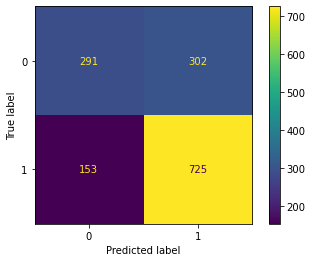

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as sm
from sklearn.naive_bayes import GaussianNB
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2, target2, test_size=1/3, random_state=42)
gnb = GaussianNB()
y_pred1 = gnb.fit(X_train2, y_train2).predict(X_test2)
print("Accuracy Score =", accuracy_score(y_test2, y_pred1))
print("Mean squared error =", round(sm.mean_squared_error(y_test2, y_pred1), 6)) 
plot_confusion_matrix(gnb, X_test2, y_test2)


# Gaussian Process Classifier Training and Testing

Accuracy Score = 0.7416723317471108
Mean squared error = 0.258328
Confusion Matrix = [[348 245]
 [135 743]]


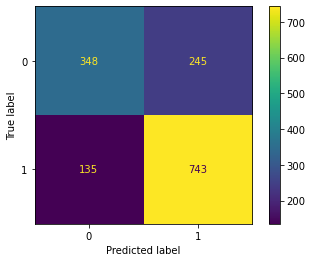

In [14]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
kernel = 1.0 * RBF(2.0)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=42).fit(X_train2, y_train2)
gpc.score(X_train2, y_train2)
y_pred2 = gpc.predict(X_test2)
print("Accuracy Score =", accuracy_score(y_test2, y_pred2))
print("Mean squared error =", round(sm.mean_squared_error(y_test2, y_pred2), 6)) 
print("Confusion Matrix =", confusion_matrix(y_test2, y_pred2))
plot_confusion_matrix(gpc, X_test2, y_test2)

# Decision Tree Classifier Training and Testing

Decision Tree Plot
Accuracy Score = 0.6614547926580557
Mean squared error = 0.338545


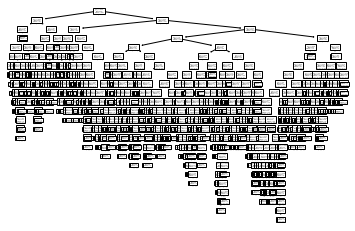

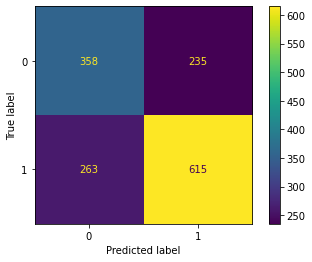

In [15]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train2, y_train2)
y_pred3 = dtc.predict(X_test2)
print("Decision Tree Plot")
tree.plot_tree(dtc)
print("Accuracy Score =", accuracy_score(y_test2, y_pred3))
print("Mean squared error =", round(sm.mean_squared_error(y_test2, y_pred3), 6)) 
plot_confusion_matrix(dtc, X_test2, y_test2)